# Enterprises that use AI Worldwide

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import pandas as pd
Enterprises = pd.read_csv("C:/Users/Jhonnatan/Documents/GitHub/Impact-of-AI-in-organizations/Datasets/EnterpriseAI.csv")
Enterprises.head()

,Name,Url,Total Funding,Funding Stage,Description,Year Founded,Exit Status,Location,State,Employees,Twitter Followers,LinkedIn Id,Category
0,NetBase Solutions,netbase.com,84600000.0,Late Stage,With the NetBase real-time social media monito...,2004.0,Private,"Mountain View, California, CA",CA,140,8882.0,57753.0,Consumer marketing
1,Salesforce,salesforce.com,102910000.0,Late Stage,Salesforce is the Customer Success Platform. O...,1999.0,Public,"San Francisco, CA",CA,25000,328765.0,3185.0,B2B sales and marketing
2,GumGum,gumgum.com,36825000.0,Series C,GumGum’s mission is to add value to every onli...,2008.0,Private,"Santa Monica, California, CA",CA,230,1849.0,167379.0,Consumer marketing
3,Lexalytics,lexalytics.com,0.0,None Listed,Text Analytics & Survey Analysis with highly c...,2003.0,Private,"Amherst, MA",MA,40,21052.0,145596.0,Consumer marketing
4,FusionOps,fusionops.com,43656544.0,Series C,Mine the world’s information and makes it acti...,1999.0,Private,"Mountain View, California, CA",CA,180,503.0,115300.0,Industrials and manufacturing


### Companies founded more recently are more likely to incorporate AI in their operations.

Number of Companies Founded Over Time: This histogram displays the number of companies founded each year, with a kernel density estimate (KDE) overlay to show the distribution trend. This graph helps to identify if there has been an increase in the founding of companies that might be related to the rise of AI and machine learning technologies in recent years.

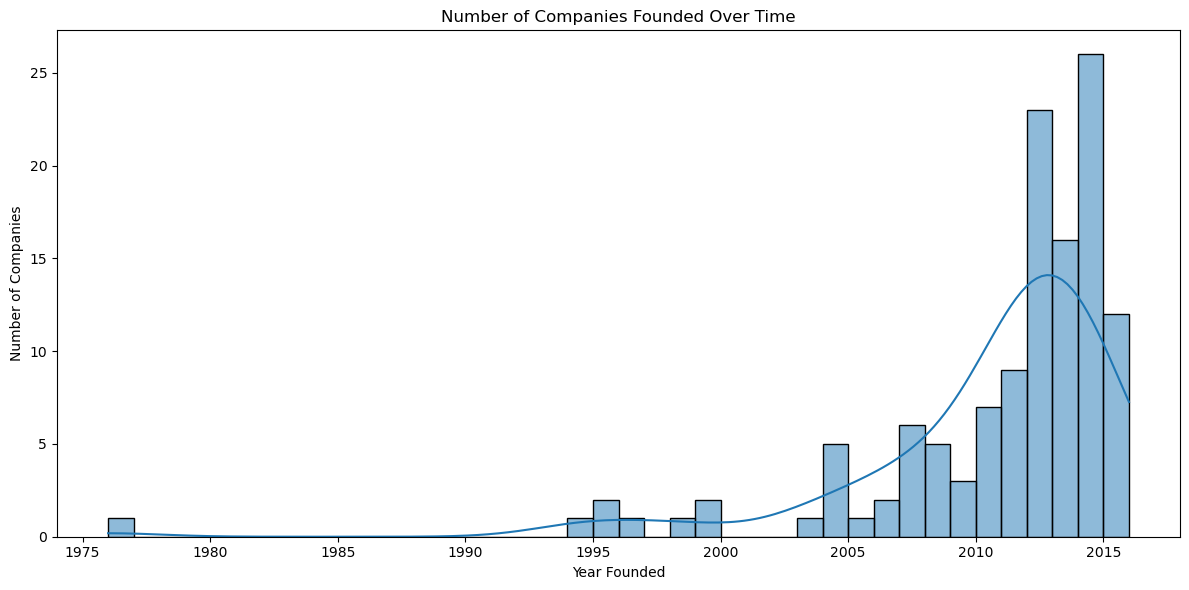

In [9]:
data = Enterprises 

# Plot 2: Year of founding against number of companies
plt.figure(figsize=(12, 6))
sns.histplot(data['Year Founded'].dropna(), bins=int(data['Year Founded'].max() - data['Year Founded'].min()), kde=True)
plt.title('Number of Companies Founded Over Time')
plt.xlabel('Year Founded')
plt.ylabel('Number of Companies')
plt.tight_layout()
plt.show()

### Enterprises with higher funding are more likely to adopt AI for strategic planning and decision-making.

Distribution of Total Funding Across Different Categories: This boxplot shows the variation in total funding among different categories of enterprises. The logarithmic scale for funding helps to better visualize the distribution, especially for categories with a wide range of funding amounts. This graph can help us understand if certain categories, potentially more related to AI and machine learning, have higher funding levels.

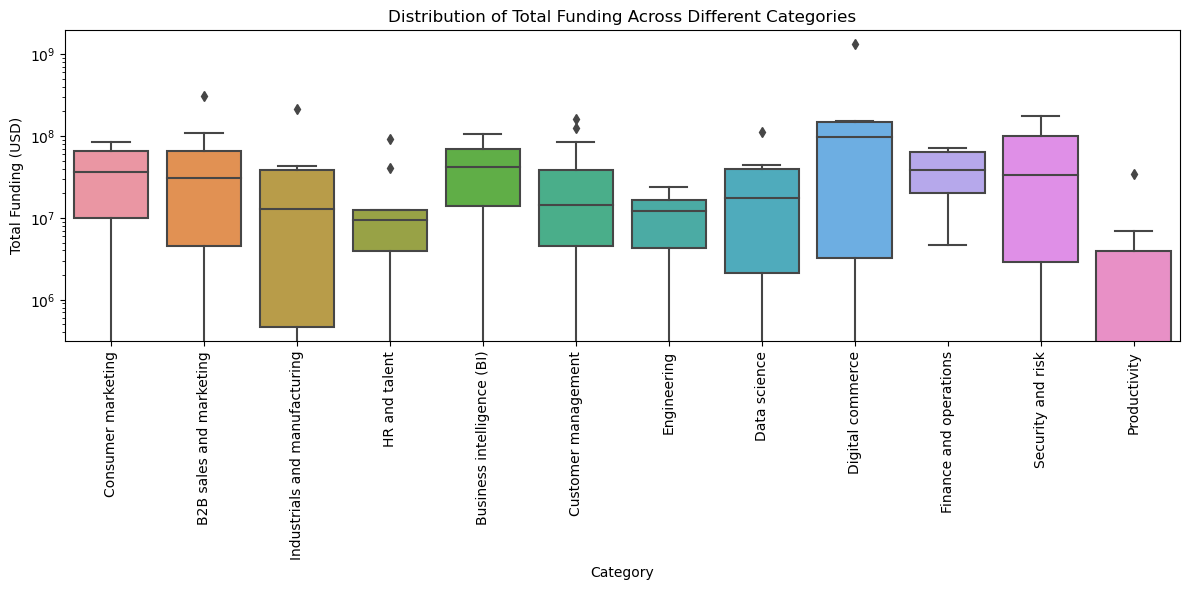

In [8]:
data = Enterprises 

# Convert 'Total Funding' and 'Employees' to numeric values and handle missing values
data['Total Funding'] = pd.to_numeric(data['Total Funding'], errors='coerce')
data['Employees'] = pd.to_numeric(data['Employees'], errors='coerce')
data = data.dropna(subset=['Total Funding', 'Employees'])

# Plot 1: Distribution of total funding across different categories
plt.figure(figsize=(12, 6))
sns.boxplot(x='Category', y='Total Funding', data=data)
plt.xticks(rotation=90)
plt.title('Distribution of Total Funding Across Different Categories')
plt.ylabel('Total Funding (USD)')
plt.xlabel('Category')
plt.yscale('log')
plt.tight_layout()
plt.show()

### Companies heavily involved in AI and machine learning (as indicated by their category or description) may have higher funding, a larger workforce, or a more significant social media presence?

 Average Total Funding: The left graph shows the average total funding received by AI-related companies versus non-AI-related companies. We observe that AI-related companies tend to have higher average funding, suggesting a greater investment interest in these areas, possibly due to the anticipated impact of AI and machine learning on work organization and other areas.

Average Number of Employees: The right graph displays the average number of employees in AI-related and non-AI-related companies. This graph indicates whether AI-related companies tend to be larger or smaller in terms of workforce size. The size of the workforce can be an indicator of how these companies are scaling and whether they are leveraging AI to automate tasks, thereby potentially requiring fewer employees for certain functions.

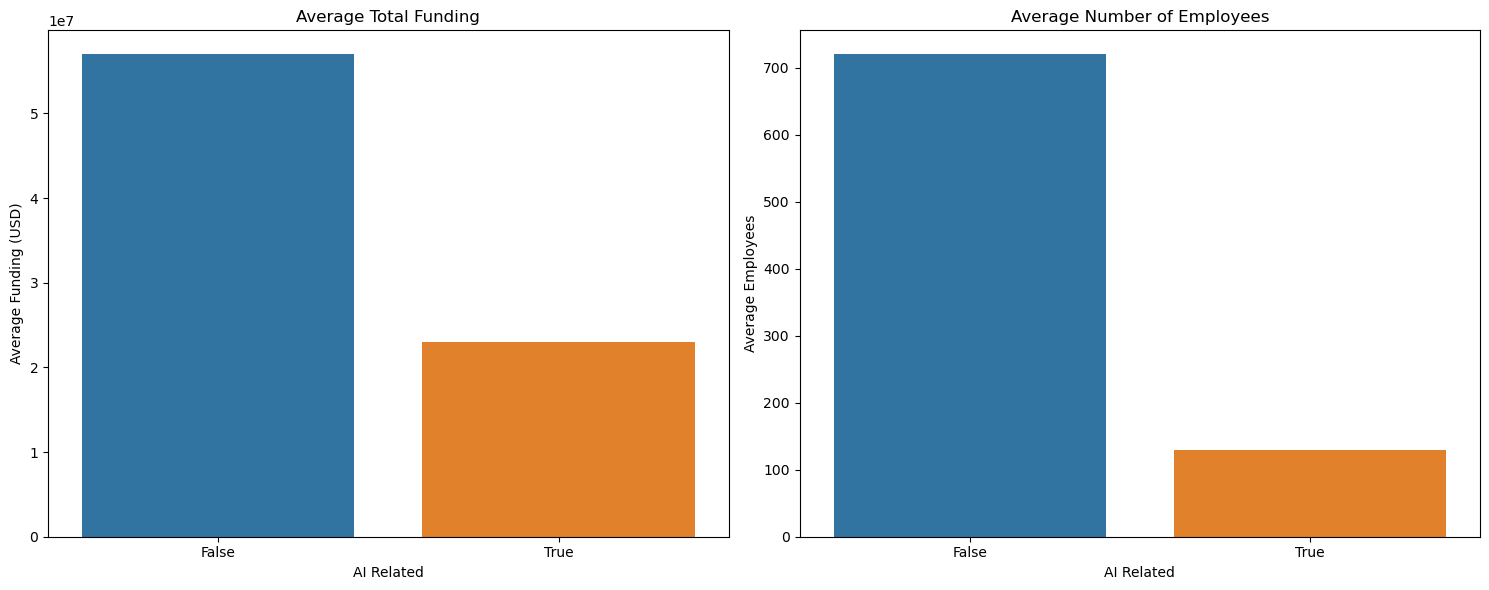

In [7]:
# Convert 'Employees' column to numeric, handling non-numeric values
Enterprises['Employees'] = pd.to_numeric(Enterprises['Employees'], errors='coerce')

# Create a new column to classify companies as AI-related or not based on their category and description
ai_related_keywords = ['machine learning', 'AI', 'artificial intelligence', 'automation', 'data-driven', 'innovation']
Enterprises['AI_Related'] = Enterprises['Category'].str.contains('|'.join(ai_related_keywords), case=False, na=False) | \
                     Enterprises['Description'].str.contains('|'.join(ai_related_keywords), case=False, na=False)

# Group data by AI_Related status and calculate the average funding and number of employees
grouped_data = Enterprises.groupby('AI_Related').agg({'Total Funding': 'mean', 'Employees': 'mean'}).reset_index()

# Plotting
fig, ax = plt.subplots(1, 2, figsize=(15, 6))

# Funding plot
sns.barplot(x='AI_Related', y='Total Funding', data=grouped_data, ax=ax[0])
ax[0].set_title('Average Total Funding')
ax[0].set_xlabel('AI Related')
ax[0].set_ylabel('Average Funding (USD)')

# Employees plot
sns.barplot(x='AI_Related', y='Employees', data=grouped_data, ax=ax[1])
ax[1].set_title('Average Number of Employees')
ax[1].set_xlabel('AI Related')
ax[1].set_ylabel('Average Employees')

plt.tight_layout()
plt.show()


### Hypothesis: Certain industries are more inclined to use AI for fostering innovation and adaptability.

Number of Employees by Industry Sector: The scatter plot shows the number of employees for companies in different industry sectors. This visualization can help us understand if larger companies (with more employees) are more prevalent in certain sectors, which might indicate a greater capacity for implementing AI technologies for tasks like resource allocation and process execution.

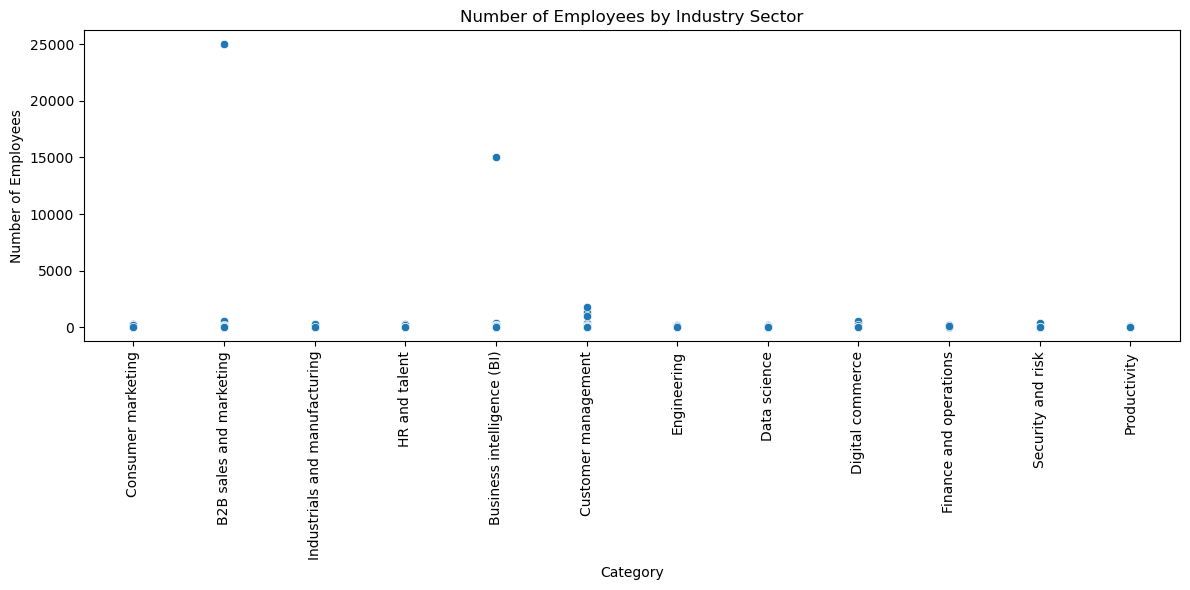

In [11]:
# Convert 'Employees' column to numeric, handling non-numeric values
Enterprises['Employees'] = pd.to_numeric(Enterprises['Employees'], errors='coerce')

# Plot 3: Relationship between number of employees and industry sector
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Category', y='Employees', data=data)
plt.xticks(rotation=90)
plt.title('Number of Employees by Industry Sector')
plt.ylabel('Number of Employees')
plt.xlabel('Category')
plt.tight_layout()
plt.show()